In [24]:
import pandas as pd
%matplotlib inline

In [25]:
amazon = pd.read_csv('/Users/arun/Downloads/Amazon_Spending.csv')

In [26]:
amazon.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,10/20/18,114-1507594-8884245,MasterCard - 8971,Amazon.com,NaN,arun06samudrala@gmail.com,10/21/18,Arun Samudrala,231 PARK DR APT 27,NaN,...,Shipped,AMZN_US(TBA362516488000),$159.95,$7.64,$0.00,$7.64,$0.00,$159.95,Arun,NaN
1,10/20/18,114-6348616-9767454,MasterCard - 8971,Amazon.com,NaN,arun06samudrala@gmail.com,10/22/18,Arun Samudrala,231 PARK DR APT 27,NaN,...,Shipped,USPS(9405511699000309569980),$190.00,$0.00,$0.00,$0.00,$0.00,$190.00,Arun,NaN
2,10/22/18,114-8237860-8184232,MasterCard - 8971,Amazon.com,NaN,arun06samudrala@gmail.com,10/23/18,Arun Samudrala,231 PARK DR APT 27,NaN,...,Shipped,UPS(1Z6W82570391223992),$12.88,$5.45,$0.81,$5.45,$0.81,$13.69,Arun,NaN
3,10/22/18,114-8237860-8184232,MasterCard - 8971,Amazon.com,NaN,arun06samudrala@gmail.com,10/25/18,Arun Samudrala,231 PARK DR APT 27,NaN,...,Shipped,AMZN_US(TBA374940594000),$31.99,$5.25,$0.00,$5.25,$0.00,$31.99,Arun,NaN
4,10/23/18,114-5465865-0867429,MasterCard - 8971,Amazon.com,NaN,arun06samudrala@gmail.com,10/27/18,Arun Samudrala,231 PARK DR APT 27,NaN,...,Shipped,USPS(9200190224058107403726),$11.99,$0.00,$0.00,$0.00,$0.00,$11.99,Arun,NaN


In [27]:
amazon.shape

(30, 23)

In [28]:
amazon = amazon.fillna(0)

In [29]:
amazon['Total Charged'] = amazon['Total Charged'].str.replace('$','').astype(float)

In [30]:
amazon['Total Charged'].sum()

1746.9199999999998

In [31]:
amazon['Total Charged'].mean()

58.23066666666668

In [32]:
amazon['Total Charged'].min()

6.49

In [33]:
amazon['Total Charged'].max()

298.95

In [34]:
amazon['Tax Charged'] = amazon['Tax Charged'].str.replace('$','').astype(float)

In [35]:
amazon['Tax Charged'].sum()

14.0

In [36]:
(amazon['Tax Charged'].sum()/amazon['Total Charged'].sum())*100

0.8014104824491105

In [37]:
amazon['Order Date'] = pd.to_datetime(amazon['Order Date'])

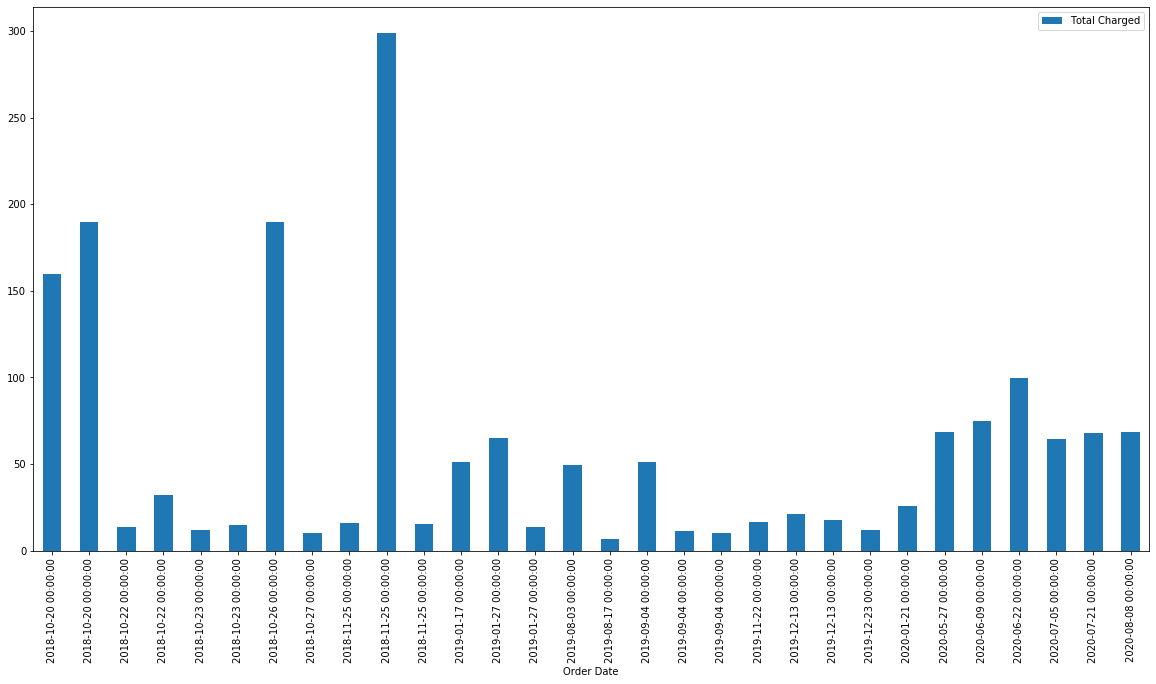

In [39]:
amazon.plot.bar(x = 'Order Date', y = 'Total Charged', figsize=(20,10))

In [40]:
daily_orders = amazon.groupby('Order Date').sum()['Total Charged']

In [41]:
daily_orders.head(5)

Order Date
2018-10-20    349.95
2018-10-22     45.68
2018-10-23     26.98
2018-10-26    190.00
2018-10-27      9.97
Name: Total Charged, dtype: float64

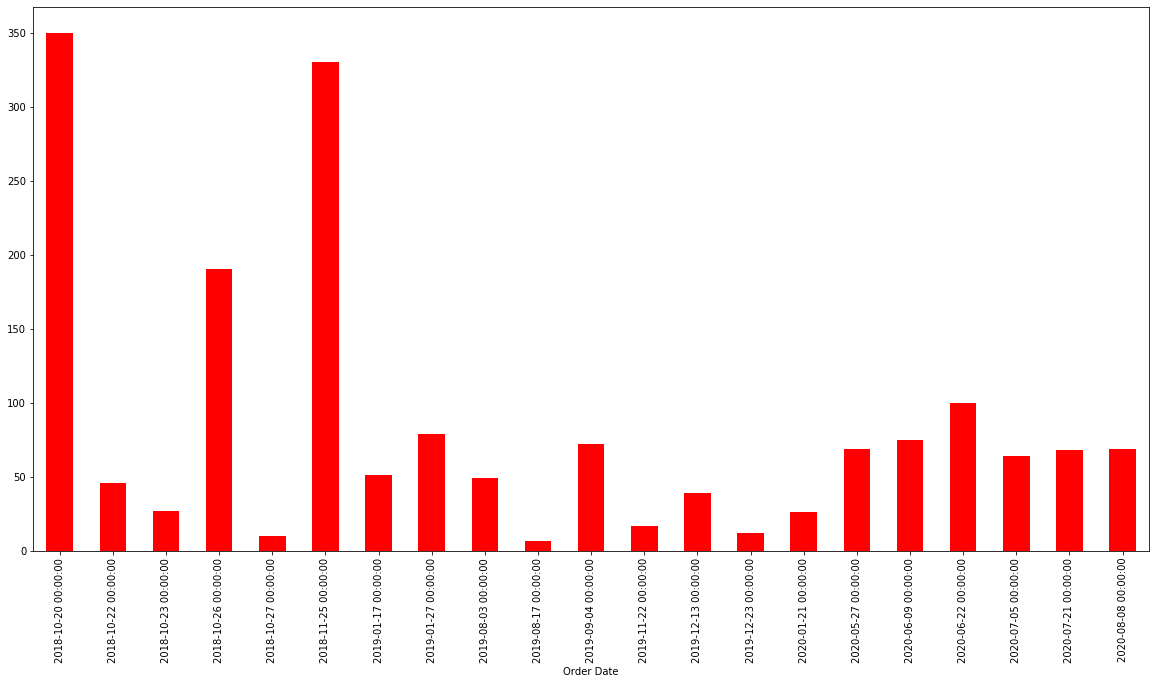

In [45]:
daily_orders.plot.bar(figsize=(20,10),color = '#FF0000')